<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Machine_Learning/blob/main/Clustering_extraindo_padroes_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01.Obtendo os clusters**

**Obtendo a base de dados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/datasets/alura_curssos/Clustering: extraindo padroes de dados'

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

https://www.kaggle.com/arjunbhasin2013/ccdata

In [ ]:
dados = pd.read_csv(path + '/CC GENERAL.csv')

In [ ]:
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Organizando os dados**

In [ ]:
dados.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [ ]:
missing = dados.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [ ]:
dados.fillna(dados.median(), inplace=True)
missing = dados.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
values = Normalizer().fit_transform(dados.values) 
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


**Executando o clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [ ]:
y_pred

array([3, 2, 3, ..., 3, 3, 4], dtype=int32)

# **02. Entendendo os critérios e métricas de validação**

**Calculando o Silhouette**

In [ ]:
from sklearn import metrics

In [ ]:
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values,labels,metric='euclidean')
print(silhouette) 

0.3645412082353538


# **03  Entendendo e Calculando o índice Davies-Bouldin**

**Calculando o Davies-Bouldin**

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0759109484969387


# **03  Entendendo e Calculando o índice Calinski Harabasz**

**Calculando o Calinski**

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels) 
print(calinski)

3431.7941358665316


# **04. Validando Clusters**

**A validação relativa**

In [ ]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [ ]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.309607364008843 3526.4405199082735


In [ ]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3644635747161945 1.0758620069408937 3431.7956206905974


In [ ]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3028650298498825 1.2080752249501683 3011.7566598631156


**A estrutura dos clusters**

In [ ]:
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2,dbs2, calinski2)

0.03941570105778812 3.5022159696383293 300.5388964379317
0.3644026320471113 1.0758234649933396 3431.784380848988


**A estabilidade dos clusters**

In [ ]:
set1, set2, set3 = np.array_split(values, 3)
w1, dbs1, calinski1 = clustering_algorithm(5, set1)
w2, dbs2, calinski2 = clustering_algorithm(5, set2)
w3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3272203126696238 1.0588202114905991 1204.064049138465
0.3644026320471113 1.1382306445993162 1194.951986504888
0.3028650298498825 1.09892070856634 1167.5339286226883


# **05. Validando os clusters**

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

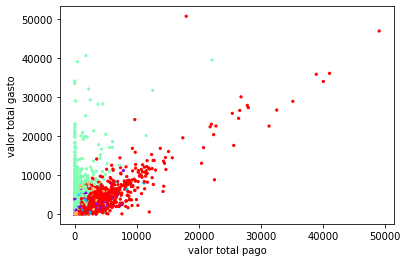

In [ ]:
plt.scatter(dados["PURCHASES"], dados["PAYMENTS"], c=labels, s=5, cmap='rainbow')
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

In [ ]:
import seaborn as sns

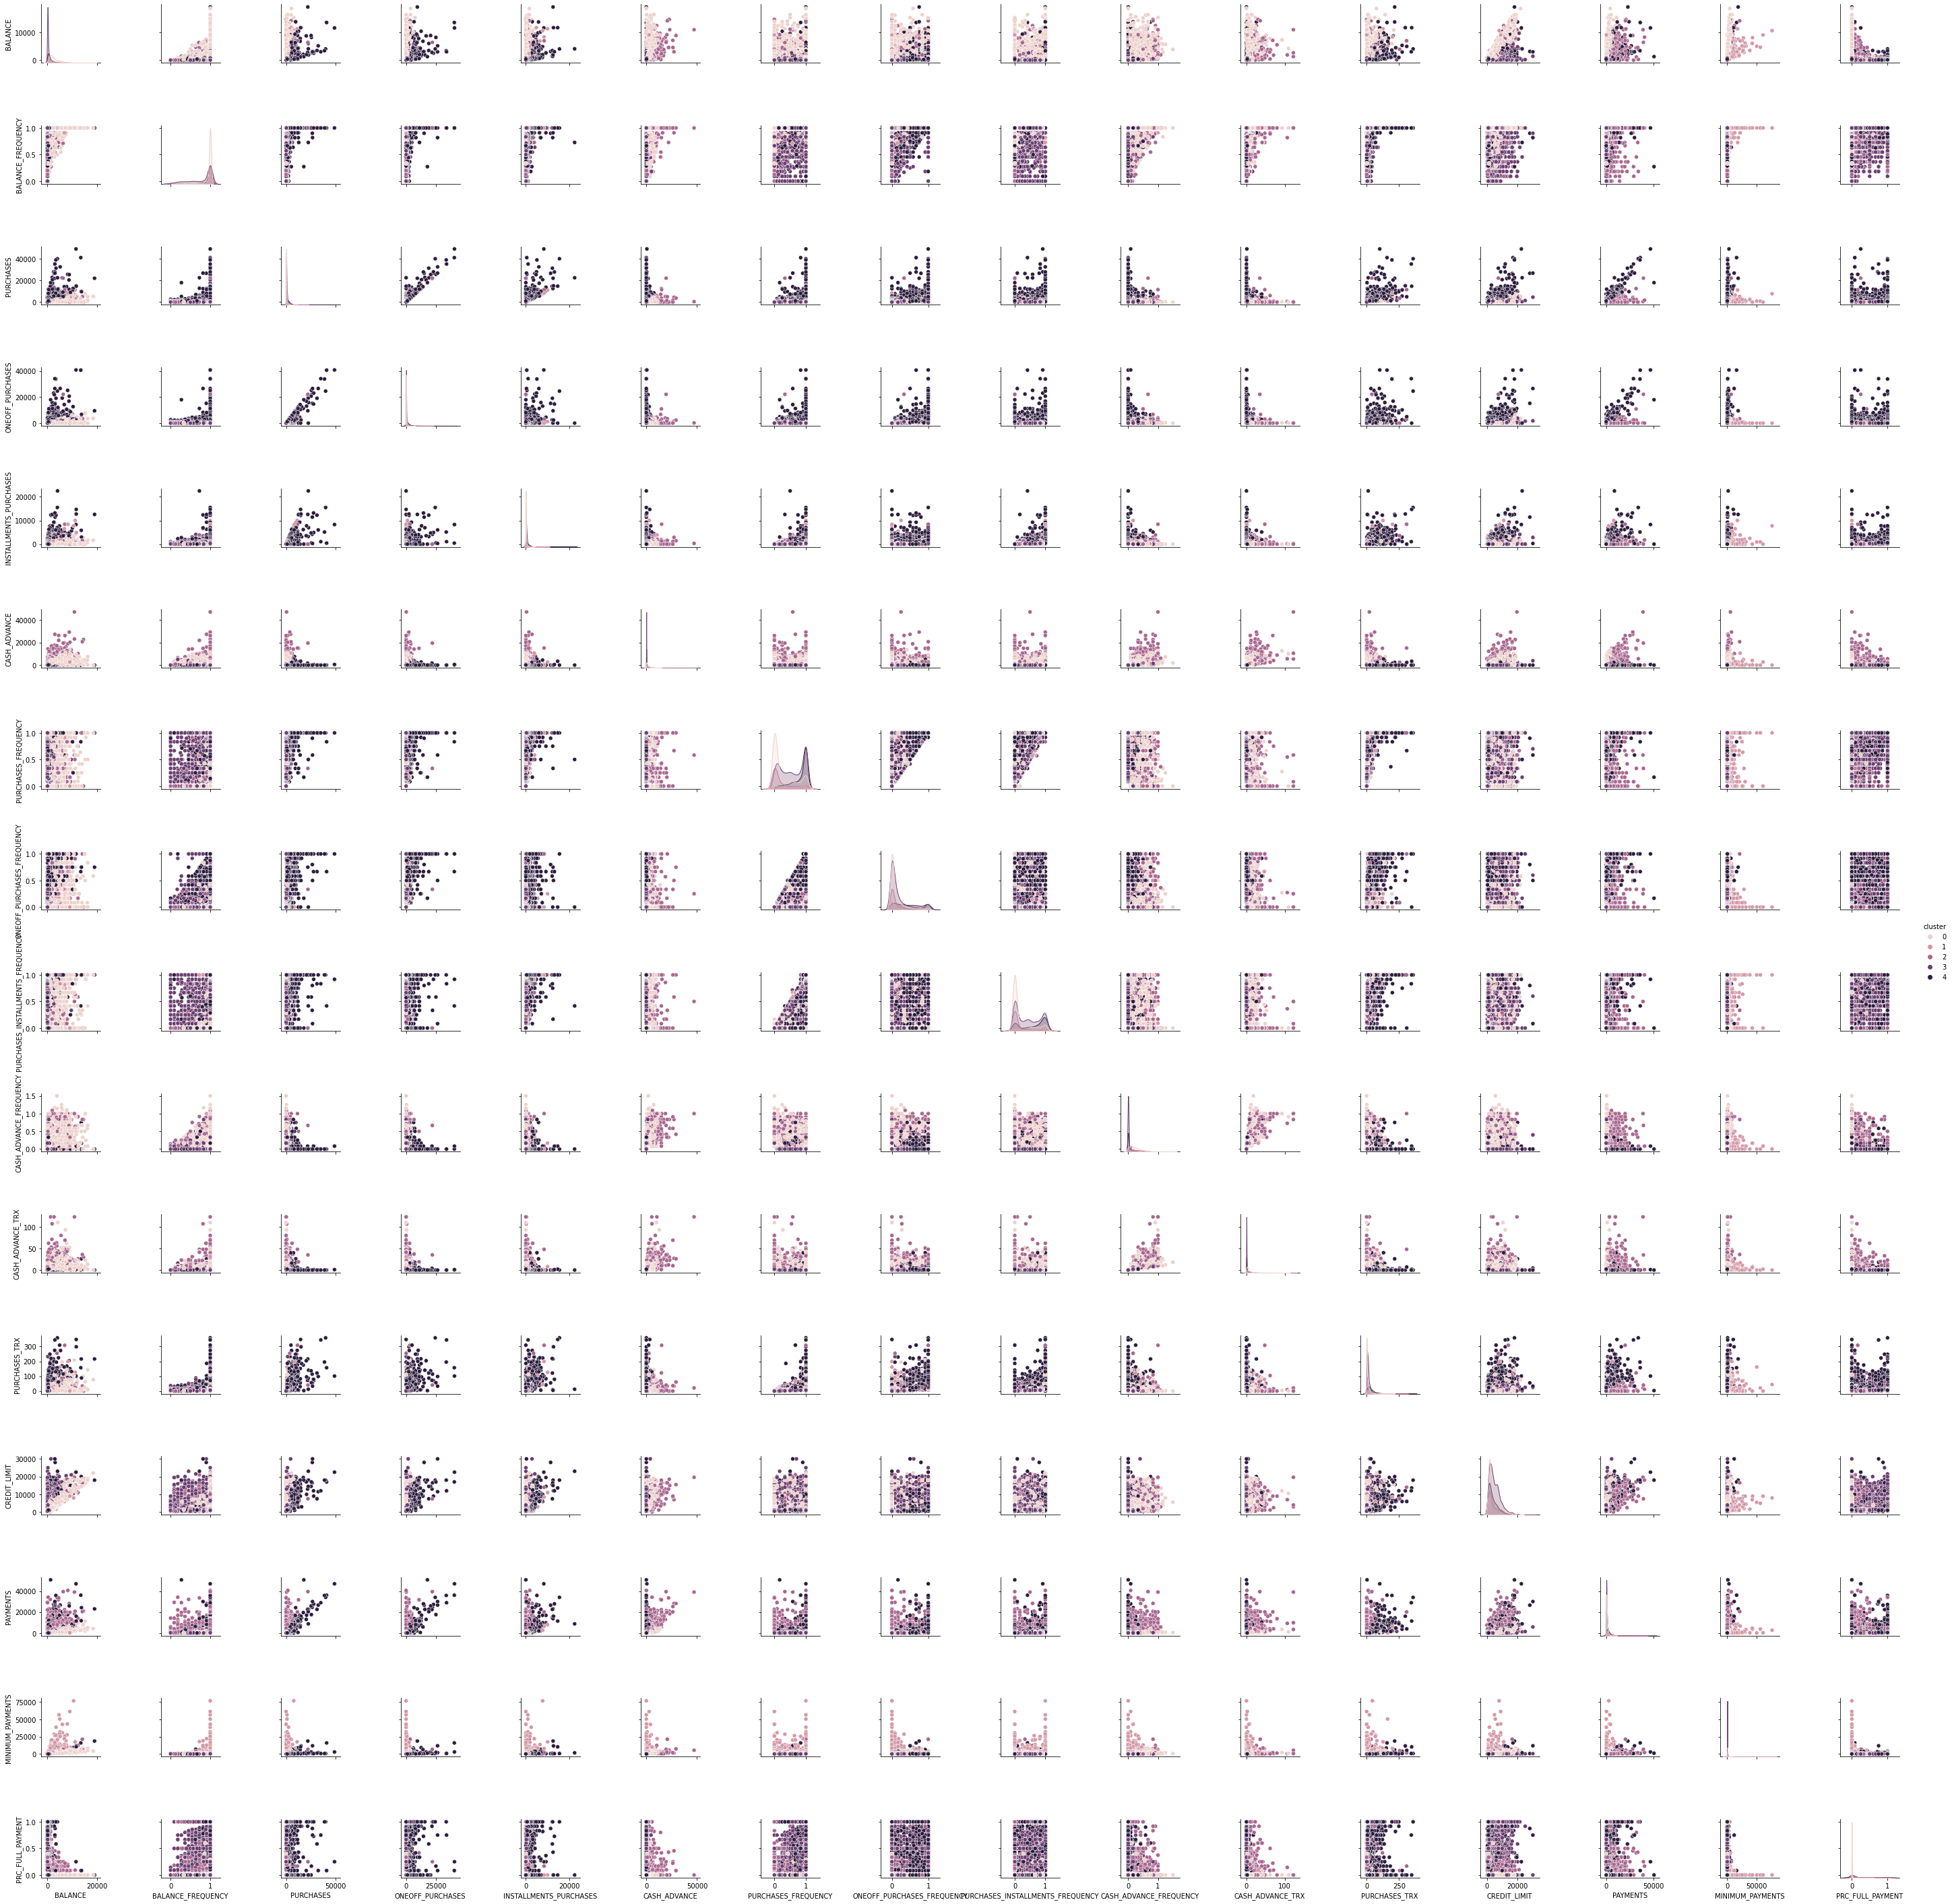

In [ ]:
dados["cluster"] = labels
sns.pairplot(dados[0:], hue="cluster")

# **06. Entendendo os valores dos atributos no cluster**

**Descrevendo os atributos**

In [ ]:
dados.groupby("cluster").describe()

BALANCE                            ... PRC_FULL_PAYMENT               
          count         mean          std  ...              50%       75%  max
cluster                                    ...                                
0        2649.0  3037.962543  2478.838161  ...         0.000000  0.000000  0.6
1         412.0  1987.146873  1852.215743  ...         0.000000  0.000000  1.0
2        1073.0  1795.328292  1982.485775  ...         0.083333  0.142857  1.0
3        3280.0   443.746756   846.398201  ...         0.000000  0.444444  1.0
4        1536.0  1141.865757  1664.809840  ...         0.083333  0.545455  1.0

[5 rows x 128 columns]

**Analisando os valores**

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [3.32972556e-01 2.68240066e-04 1.58923673e-01 3.62178588e-02
  1.23089552e-01 5.82140753e-02 1.66817881e-04 2.64295391e-05
  1.47135264e-04 1.92748591e-05 4.26896159e-04 3.86195702e-03
  3.76646957e-01 2.52402941e-01 6.79571553e-01 4.22964707e-06]
 [2.35130689e-01 2.16418717e-04 6.04525670e-02 3.44569238e-02
  2.60008529e-02 3.99755165e-01 5.26563547e-05 2.05235176e-05
  3.52245850e-05 6.54254245e-05 1.57052528e-03 1.12425758e-03
  5.35275552e-01 5.98057989e-01 1.04294158e-01 2.77348362e-05]
 [6.90890221e-02 2.30787435e-04 1.21507361e-01 4.79670320e-02
  7.36405575e-02 2.43310654e-02 1.72863102e-04 3.36686718e-05
  1.40328311e-04 7.92341768e-06 1.23962309e-04 2.86381277e-03
  9.43564102e-01 1.53799817e-01 5.68529799e-02 7.61493366e-05]
 [1.